<a href="https://colab.research.google.com/github/CayoPOliveira/JupiterNotebooks/blob/main/Robotica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Translação**
Escrever um programa de computador que recebe as coordenadas do ponto P a ser transladado. A translação deve ser de 2 unidades em x, 3 unidades  em y, e 5 unidades em z. Apresentar a matriz de transformação e plotar as novas coordenadas.

X:0
Y:0
Z:0
Matriz de Transformação:
[[1. 0. 0. 2.]
 [0. 1. 0. 3.]
 [0. 0. 1. 5.]
 [0. 0. 0. 1.]]
Novo ponto: [2. 3. 5.]


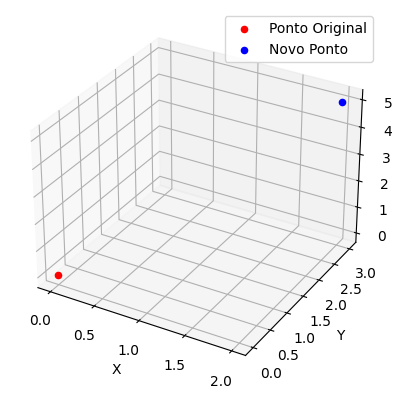

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def translacao_ponto(ponto, translacao):
    matriz_translacao = np.eye(4)
    matriz_translacao[:3, 3] = translacao
    ponto_homogeneo = np.append(ponto, 1)
    novo_ponto_homogeneo = np.dot(matriz_translacao, ponto_homogeneo)[:3]
    return (novo_ponto, matriz_translacao)

# Coordenadas do ponto P
ponto = np.array([int(input("X:")), int(input("Y:")), int(input("Z:"))])

# Vetor de translação
translacao = np.array([2, 3, 5])

# Realiza a translação do ponto P
novo_ponto, matriz_translacao = translacao_ponto(ponto, translacao)

# Imprime a matriz de transformação
print(f"Matriz de Transformação:\n{matriz_translacao}")

print(f"Novo ponto: {novo_ponto}")

# Plota as coordenadas originais e as novas coordenadas
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ponto[0], ponto[1], ponto[2], color='red', \
           label='Ponto Original')
ax.scatter(novo_ponto[0], novo_ponto[1], novo_ponto[2], \
           color='blue', label='Novo Ponto')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

# **Translações sucessivas**
Escrever um programa que recebe x0,  y0  e z0 da matriz de transformação T0, x1, y1 e z1  da matriz de transformação T1. Realizar a transformação sucessiva T0. T1 e a transformação T1. T0 sobre o ponto $P=(3,4,7)$.  Apresentar os resultados destas duas  transformações  sucessivas.

In [ ]:
import numpy as np

def transformacao_sucessiva(ponto, matriz_t0, matriz_t1):
    # Transformação sucessiva T0.T1
    ponto_transformado = np.dot(matriz_t0, np.dot(matriz_t1, ponto))

    # Transformação sucessiva T1.T0
    ponto_transformado_invertido = np.dot(matriz_t1, np.dot(matriz_t0, ponto))

    return ponto_transformado, ponto_transformado_invertido

# Coordenadas do ponto P
ponto = np.array([3, 4, 7, 1])

# Matriz de transformação T0
x0, y0, z0 = int(input("x0:")), int(input("y0:")), int(input("z0:"))
matriz_t0 = np.array([[1, 0, 0, x0],
                      [0, 1, 0, y0],
                      [0, 0, 1, z0],
                      [0, 0, 0, 1]])

# Matriz de transformação T1
x1, y1, z1 = int(input("x1:")), int(input("y1:")), int(input("z1:"))
matriz_t1 = np.array([[1, 0, 0, x1],
                      [0, 1, 0, y1],
                      [0, 0, 1, z1],
                      [0, 0, 0, 1]])

# Realiza as transformações sucessivas
ponto_transformado1, ponto_transformado2 = transformacao_sucessiva(\
                                                                   ponto, matriz_t0, matriz_t1)

# Imprime os resultados das transformações sucessivas
print(f"Resultado da transformação T0.T1:{ponto_transformado1[:3]}")
print(f"Resultado da transformação T1.T0:{ponto_transformado2[:3]}")

x0:1
y0:2
z0:3
x1:2
y1:1
z1:0
Resultado da transformação T0.T1:
[ 6  7 10]
Resultado da transformação T1.T0:
[ 6  7 10]


# **Rotação**
Escrever um programa que recebe o ângulo $\theta$ a ser rotacionado em torno do eixo z e calcula as novas coordenadas do  ponto $P=(4,5,6)$ após sua rotação. Plotar as novas  coordenadas.

Theta em graus:90
Ponto original:[4 5 6]
Ponto rotacionado:[-5.0, 4.0, 6.0]


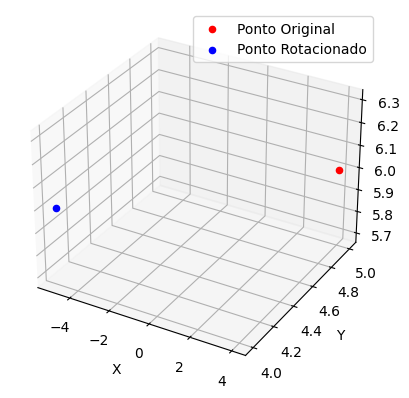

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rotacao_z(ponto, theta):
    matriz_rotacao = np.array([[np.cos(theta), -np.sin(theta), 0, 0],
                               [np.sin(theta), np.cos(theta), 0, 0],
                               [0, 0, 1, 0],
                               [0, 0, 0, 1]])
    ponto_rotacionado = np.dot(matriz_rotacao, ponto)
    return ponto_rotacionado

# Coordenadas do ponto P
ponto = np.array([4, 5, 6, 1])

# Ângulo de rotação em torno do eixo Z
theta = np.radians(int(input("Theta em graus:")))  # Converter para radianos

# Realiza a rotação do ponto P
ponto_rotacionado = rotacao_z(ponto, theta)

# Imprime o ponto original e o rotacionado
print(f"Ponto original:{ponto[:3]}\nPonto rotacionado:{list(ponto_rotacionado[:3])}")

# Plota as coordenadas originais e as novas coordenadas
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ponto[0], ponto[1], ponto[2], color='red', label='Ponto Original')
ax.scatter(ponto_rotacionado[0], ponto_rotacionado[1], ponto_rotacionado[2], color='blue', label='Ponto Rotacionado')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

# **Rotações sucessivas**
Escrever um programa que recebe o ângulo teta da  primeira rotação R1, e o ângulo alfa da segunda rotação  R2 a serem aplicados  sobre o ponto $P=(6,6,8)$. Plotar as novas coordenadas.

Theta em graus:90
Eixo para rotacionar em Theta:x
Alpha em graus:90
Eixo para rotacionar em Alpha:y


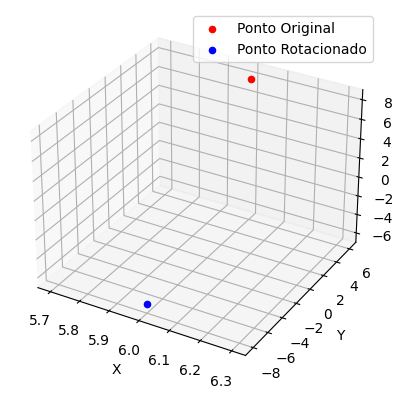

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rotacao_x(ponto, ang):
    matriz_rotacao_x = np.array([[1, 0, 0, 0],
                                 [0, np.cos(ang), -np.sin(ang), 0],
                                 [0, np.sin(ang), np.cos(ang), 0],
                                 [0, 0, 0, 1]])
    ponto_rotacionado_x = np.dot(matriz_rotacao_x, ponto)
    return ponto_rotacionado_x

def rotacao_y(ponto, ang):
    matriz_rotacao_y = np.array([[np.cos(ang), 0, np.sin(ang), 0],
                                 [0, 1, 0, 0],
                                 [-np.sin(ang), 0, np.cos(ang), 0],
                                 [0, 0, 0, 1]])
    ponto_rotacionado_y = np.dot(matriz_rotacao_y, ponto)
    return ponto_rotacionado_y

def rotacao_z(ponto, ang):
    matriz_rotacao_z = np.array([[np.cos(ang), -np.sin(ang), 0, 0],
                                 [np.sin(ang), np.cos(ang), 0, 0],
                                 [0, 0, 1, 0],
                                 [0, 0, 0, 1]])
    ponto_rotacionado_z = np.dot(matriz_rotacao_z, ponto)
    return ponto_rotacionado_z

# Coordenadas do ponto P
ponto = np.array([6, 6, 8, 1])

# Ângulos de rotação em torno dos eixos X e Z
theta = np.radians(int(input("Theta em graus:")))  # Converter para radianos
eixoTheta = input("Eixo para rotacionar em Theta:")
alpha = np.radians(int(input("Alpha em graus:")))  # Converter para radianos
eixoAlpha = input("Eixo para rotacionar em Alpha:")

# Realiza as rotações consecutivas do ponto P
if(eixoTheta=="X" or eixoTheta=="x"): ponto_rotacionado_1 = rotacao_x(ponto, theta)
elif(eixoTheta=="Y" or eixoTheta=="y"): ponto_rotacionado_1 = rotacao_y(ponto, theta)
else: ponto_rotacionado_1 = rotacao_z(ponto, theta)

if(eixoAlpha=="X" or eixoAlpha=="x"): ponto_rotacionado_2 = rotacao_x(ponto_rotacionado_1, alpha)
elif(eixoAlpha=="Y" or eixoAlpha=="y"): ponto_rotacionado_2 = rotacao_y(ponto_rotacionado_1, alpha)
else: ponto_rotacionado_2 = rotacao_z(ponto_rotacionado_1, alpha)

# Plota as coordenadas originais e as novas coordenadas
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ponto[0], ponto[1], ponto[2], color='red', label='Ponto Original')
ax.scatter(ponto_rotacionado_2[0], ponto_rotacionado_2[1], ponto_rotacionado_2[2], color='blue', label='Ponto Rotacionado')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

# **Translação e rotação sucessivas**
Escrever um programa que recebe x e y  da matriz de translação T e o ângulo teta da matriz de rotação R a serem aplicados  sobre o ponto $P=(4,5,7)$.  Plotar o resultado da  transformação  sucessiva $T.R$ e o resultado da transformação sucessiva $R.T$.

Digite a coordenada x da translação: 2
Digite a coordenada y da translação: 4
Digite o ângulo de rotação em graus: 90
Eixo para rotacionar:z


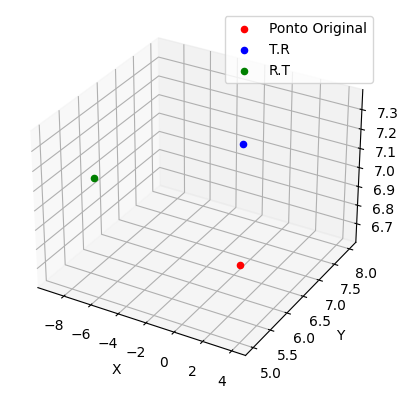

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def translacao(ponto, x, y):
    matriz_translacao = np.array([[1, 0, 0, x],
                                  [0, 1, 0, y],
                                  [0, 0, 1, 0],
                                  [0, 0, 0, 1]])
    return np.dot(matriz_translacao, ponto)
def rotacao_x(ponto, ang):
    matriz_rotacao_x = np.array([[1, 0, 0, 0],
                                 [0, np.cos(ang), -np.sin(ang), 0],
                                 [0, np.sin(ang), np.cos(ang), 0],
                                 [0, 0, 0, 1]])
    return np.dot(matriz_rotacao_x, ponto)
def rotacao_y(ponto, ang):
    matriz_rotacao_y = np.array([[np.cos(ang), 0, np.sin(ang), 0],
                                 [0, 1, 0, 0],
                                 [-np.sin(ang), 0, np.cos(ang), 0],
                                 [0, 0, 0, 1]])
    return np.dot(matriz_rotacao_y, ponto)
def rotacao_z(ponto, ang):
    matriz_rotacao_z = np.array([[np.cos(ang), -np.sin(ang), 0, 0],
                                 [np.sin(ang), np.cos(ang), 0, 0],
                                 [0, 0, 1, 0],
                                 [0, 0, 0, 1]])
    return np.dot(matriz_rotacao_z, ponto)

# Coordenadas do ponto P
ponto = np.array([4, 5, 7, 1])

# Coordenadas de translação (x, y)
x = float(input("Digite a coordenada x da translação: "))
y = float(input("Digite a coordenada y da translação: "))

# Ângulo de rotação em torno do eixo fornecido
theta = np.radians(float(input("Digite o ângulo de rotação em graus: ")))  # Converter para radianos
eixoTheta = input("Eixo para rotacionar:")

# Realiza as transformações sucessivas T.R e R.T
if(eixoTheta=="X" or eixoTheta=="x"): ponto_translacao_rotacao = translacao(rotacao_x(ponto, theta), x, y)
elif(eixoTheta=="Y" or eixoTheta=="y"): ponto_translacao_rotacao = translacao(rotacao_y(ponto, theta), x, y)
else: ponto_translacao_rotacao = translacao(rotacao_z(ponto, theta), x, y)

if(eixoTheta=="X" or eixoTheta=="x"): ponto_rotacao_translacao = rotacao_x(translacao(ponto, x, y), theta)
elif(eixoTheta=="Y" or eixoTheta=="y"): ponto_rotacao_translacao = rotacao_y(translacao(ponto, x, y), theta)
else: ponto_rotacao_translacao = rotacao_z(translacao(ponto, x, y), theta)

# Plota os resultados
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ponto[0], ponto[1], ponto[2], color='red', label='Ponto Original')
ax.scatter(ponto_translacao_rotacao[0], ponto_translacao_rotacao[1], ponto_translacao_rotacao[2], color='blue', label='T.R')
ax.scatter(ponto_rotacao_translacao[0], ponto_rotacao_translacao[1], ponto_rotacao_translacao[2], color='green', label='R.T')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

Considere o robô de  dois elos mostrado abaixo:

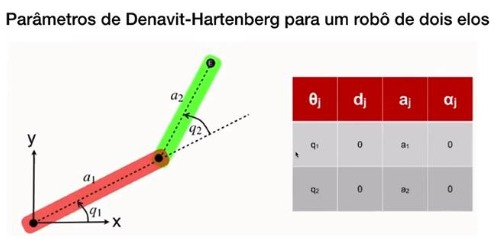

Escreva um programa que recebe os parâmetros deDenavitHartenberge apresenta as coordenadas (x,y)  do seu TCP.

Quantos elos possui o sistema? 3
Theta0:50
d0:0
a0:10
Alpha0:0
Theta1:50
d1:5
a1:5
Alpha1:0
Theta2:60
d2:0
a2:20
Alpha2:0
As coordenadas (x, y) do TCP são: (-14.102458095522076, 24.348924827825236)


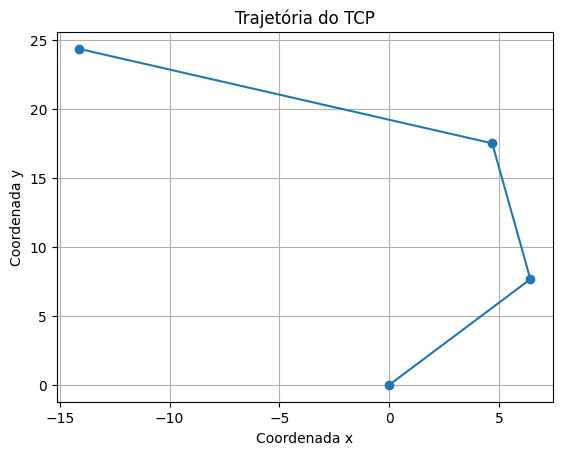

In [ ]:
import math
import matplotlib.pyplot as plt

def dh_to_coordinates(theta, d, a, alpha):
    # Inicialização das variáveis
    x = [0]  # Lista para armazenar as coordenadas x
    y = [0]  # Lista para armazenar as coordenadas y

    # Loop através dos parâmetros de Denavit-Hartenberg
    for i in range(len(theta)):
        # Cálculo das transformações de Denavit-Hartenberg
        if i!=0:
          theta[i] += theta[i-1]
          alpha[i] += alpha[i-1]
        cos_theta = math.cos(theta[i])
        sin_theta = math.sin(theta[i])
        cos_alpha = math.cos(alpha[i])
        sin_alpha = math.sin(alpha[i])

        # Atualização das coordenadas x e y
        x.append(a[i] * cos_theta + x[-1])
        y.append(a[i] * sin_theta + y[-1])

        # Atualização das coordenadas x e y considerando a rotação
        x_temp = x[-1] * cos_alpha - y[-1] * sin_alpha
        y[-1] = x[-1] * sin_alpha + y[-1] * cos_alpha
        x[-1] = x_temp

        # Atualização das coordenadas x e y considerando o deslocamento
        x[-1] += d[i] * cos_theta
        y[-1] += d[i] * sin_theta

    return x, y

# Exemplo de parâmetros de Denavit-Hartenberg
# theta = [math.radians(30), math.radians(45), math.radians(60)]
# d = [1, 0, 0]
# a = [0, 1, 1]
# alpha = [math.radians(90), math.radians(0), math.radians(0)]

#input
n = int(input("Quantos elos possui o sistema? "))
theta, d, a, alpha = [], [], [], []
for i in range(n):
  theta.append(math.radians(int(input(f"Theta{i}:"))))
  d.append(int(input(f"d{i}:")))
  a.append(int(input(f"a{i}:")))
  alpha.append(math.radians(int(input(f"Alpha{i}:"))))

# Chamada da função para obter as coordenadas (x, y)
x, y = dh_to_coordinates(theta, d, a, alpha)

# Impressão das coordenadas (x, y)
print(f"As coordenadas (x, y) do TCP são: ({x[-1]}, {y[-1]})")

# Plotagem do gráfico
plt.plot(x, y, '-o')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Trajetória do TCP')
plt.grid(True)
plt.show()

Escrever um programa de computador para calcular a posição e orientação do  manipulador 2 DOF em   3D.
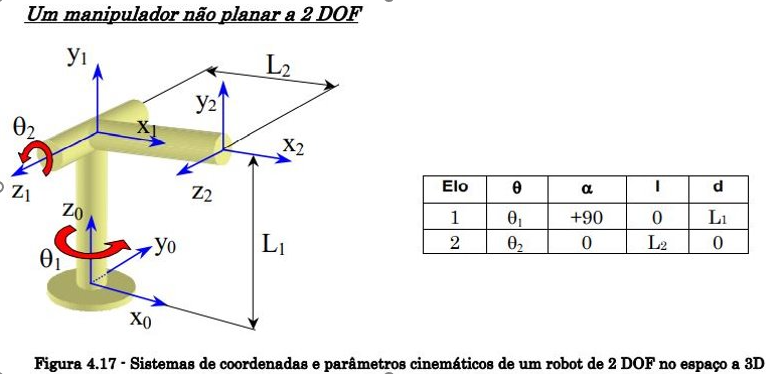

In [ ]:
import math
import numpy as np
from functools import reduce

def coordinates(theta, d, l, alpha):
  St, Sa = [math.sin(t) for t in theta], [math.sin(a) for a in alpha]
  Ct, Ca = [math.cos(t) for t in theta], [math.cos(a) for a in alpha]
  A = [ np.array([  [Ct[i], -St[i]*Ca[i], St[i]*Sa[i], l[i]*Ct[i]],
                    [St[i], Ct[i]*Ca[i], -Ct[i]*Sa[i], l[i]*St[i]],
                    [0,     Sa[i],        Ca[i],       d[i]],
                    [0,     0,            0,           1]
                ]) for i in range(2)]
  return reduce(np.matmul, A)

#input
theta, alpha, d, l = [math.radians(int(input(f"Th:"))), math.radians(int(input(f"Th:")))],\
                      [math.radians(90), math.radians(0)],\
                      [int(input("L1:")), 0],\
                      [0, int(input("L2:"))]

# Chamada da função para obter as coordenadas e orientação
result = coordinates(theta, d, l, alpha).astype(int)
print(f"Posição:\nx={result[0][3]}, y={result[1][3]}, z={result[2][3]}\nRotação:")
for i in range(3):
  print(result[i][:3])

print("\nrTh = ")
print(result)

Th:4
Th:80
L1:12
L2:24
Posição:
x=4, y=0, z=35
Rotação:
[0 0 0]
[0 0 0]
[0 0 0]

rTh = 
[[ 0  0  0  4]
 [ 0  0  0  0]
 [ 0  0  0 35]
 [ 0  0  0  1]]


Escrever um programa  de computador onde dadas as coordenadas (x,y) e (orientação do TCP) do sistema robótico 3R apresentado a seguir, obter os ângulos  θ1, θ2 e θ3.

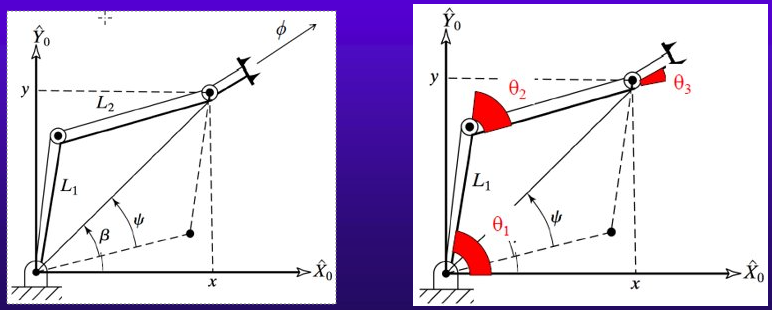

In [ ]:
import numpy as np
import math

l1, l2 = int(input("L1:")), int(input("L2:"))
x, y = float(input("X:")) , float(input("Y:"))
phi = math.radians(float(input(f"Phi:")))

theta2 =  math.acos(  ((x*x) + (y*y) - (l1*l1) - (l2*l2)) / (2*l1*l2) )
if theta2 < 0:
  theta1 = math.atan2(y,x) + math.acos(  ((x*x) + (y*y) + (l1*l1) - (l2*l2)) / (2*l1* math.sqrt((x*x) + (y*y)) ) )
elif theta2 > 0:
  theta1 = math.atan2(y,x) -  math.acos(  ((x*x) + (y*y) + (l1*l1) - (l2*l2)) / (2*l1* math.sqrt((x*x) + (y*y)) ) )
theta3 = phi - (theta1 + theta2)

print(f"Os angulos em graus são:\nTheta1 = {math.degrees(theta1)}\nTheta2 = {math.degrees(theta2)}\nTheta3 = {math.degrees(theta3)}")

L1:5
L2:6
X:3
Y:2
Phi:45
Os angulos em graus são:
Theta1 = -53.13010235415598
Theta2 = 143.13010235415598
Theta3 = -45.0


Dada as coordenadas (x,y,z) do sistema robótico 4R apresentado a seguir, obtenha os ângulos utilizando evolução diferencial.

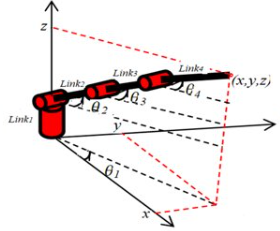

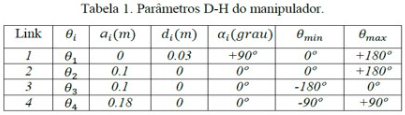

X:0.1
Y:0.15
Z:0.3
Novo x: 0.10028538057035048
Novo y: 0.1501798280051245
Novo z: 0.299900683732512
Melhores ângulos encontrados:
Theta1: 56.27
Theta2: 170.35
Theta3: -177.49
Theta4: 5.73


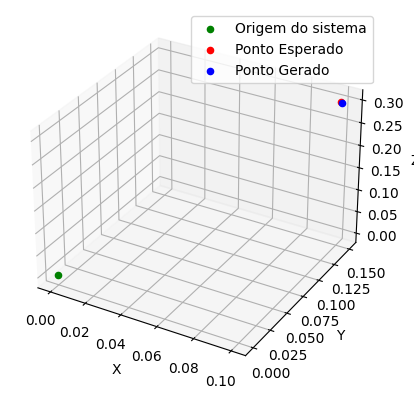

In [ ]:
import random
import math
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Função de cinemática direta
def coordinates(theta):
  # Parâmetros definidos e fixos
  l = [0.0, 0.1, 0.1, 0.18]
  d = [0.3, 0.0, 0.0, 0.0]
  alpha = [math.radians(90), 0.0, 0.0, 0.0]

  St, Sa = [math.sin(t) for t in theta], [math.sin(a) for a in alpha]
  Ct, Ca = [math.cos(t) for t in theta], [math.cos(a) for a in alpha]
  A = [ np.array([  [Ct[i], -St[i]*Ca[i], St[i]*Sa[i], l[i]*Ct[i]],
                    [St[i], Ct[i]*Ca[i], -Ct[i]*Sa[i], l[i]*St[i]],
                    [0,     Sa[i],        Ca[i],       d[i]],
                    [0,     0,            0,           1]
                ]) for i in range(4)]
  return A

# Função de avaliação - Calcula a diferença entre as coordenadas atuais e desejadas
def evaluate_solution(candidate, x, y, z):
    # Cinemática direta do sistema 4R para calcular as coordenadas atuais
    # com base nos ângulos candidatos (candidate) e armazenalas em x_atual, y_atual, z_atual
    coordinada_final = reduce(np.matmul, coordinates(candidate)).astype(float)
    x_atual = coordinada_final[0][3]
    y_atual = coordinada_final[1][3]
    z_atual = coordinada_final[2][3]

    # Calcule a diferença entre as coordenadas atuais e desejadas
    diff_x = abs(x_atual - x)
    diff_y = abs(y_atual - y)
    diff_z = abs(z_atual - z)

    # Retorne a soma das diferenças como medida de avaliação
    return diff_x + diff_y + diff_z

# Função para gerar a população inicial de soluções candidatas
def generate_initial_population(population_size, theta1_limits, theta2_limits, theta3_limits, theta4_limits):
    population = []
    for _ in range(population_size):
        theta1 = random.uniform(*theta1_limits)
        theta2 = random.uniform(*theta2_limits)
        theta3 = random.uniform(*theta3_limits)
        theta4 = random.uniform(*theta4_limits)
        population.append([theta1, theta2, theta3, theta4])
    return population

# Função para aplicar o algoritmo de evolução diferencial
def differential_evolution(x, y, z, population_size, generations, F, theta1_limits, theta2_limits, theta3_limits, theta4_limits):
    # Gere a população inicial
    population = generate_initial_population(population_size, theta1_limits, theta2_limits, theta3_limits, theta4_limits)

    # Execute as gerações
    for _ in range(generations):
        for i in range(population_size):
            # Selecione quatro soluções candidatas aleatórias, diferentes da solução atual
            candidates = random.sample(population, 4)
            while population[i] in candidates:
                candidates = random.sample(population, 4)

            # Gere uma nova solução candidata usando a equação do algoritmo de evolução diferencial
            new_candidate = []
            for j in range(4):
                new_value = population[i][j] + F * (candidates[0][j] - candidates[1][j]) + F * (candidates[2][j] - candidates[3][j])
                new_candidate.append(new_value)

            # Avalie a nova solução candidata
            current_evaluation = evaluate_solution(population[i], x, y, z)
            new_evaluation = evaluate_solution(new_candidate, x, y, z)

            # Substitua a solução atual pela nova solução se for melhor
            if new_evaluation < current_evaluation:
                population[i] = new_candidate

    # Encontre a melhor solução após todas as gerações
    best_solution = min(population, key=lambda candidate: evaluate_solution(candidate, x, y, z))
    return best_solution

# Valores de entrada
x_desejado = float(input("X:"))  # Valor desejado para a coordenada x
y_desejado = float(input("Y:"))  # Valor desejado para a coordenada y
z_desejado = float(input("Z:"))  # Valor desejado para a coordenada z

population_size = 200  # Tamanho da população de soluções candidatas
generations = 200  # Número de gerações
F = 0.1  # Fator de escala

# Limites dos ângulos theta
theta1_limits = (0, math.radians(180))  # Limites para theta1 (base)
theta2_limits = (0, math.radians(180))  # Limites para theta2
theta3_limits = (math.radians(-180), 0)  # Limites para theta3
theta4_limits = (math.radians(-90), math.radians(90))  # Limites para theta4

# Execução do algoritmo de evolução diferencial
best_angles = differential_evolution(x_desejado, y_desejado, z_desejado, population_size, generations, F,
                                    theta1_limits, theta2_limits, theta3_limits, theta4_limits)

# Cinemática direta do sistema 4R para calcular as coordenadas atuais
# com base nos ângulos candidatos (candidate) e armazenalas em x_atual, y_atual, z_atual
coordinada_final = reduce(np.matmul, coordinates(best_angles)).astype(float)
x_atual = coordinada_final[0][3]
y_atual = coordinada_final[1][3]
z_atual = coordinada_final[2][3]

# Imprima os valores de x, y e z encontrados
print(f"Novo x: {x_atual}")
print(f"Novo y: {y_atual}")
print(f"Novo z: {z_atual}")

# Imprima os melhores ângulos encontrados
print("Melhores ângulos encontrados:")
print("Theta1: {:.2f}".format(math.degrees(best_angles[0])))
print("Theta2: {:.2f}".format(math.degrees(best_angles[1])))
print("Theta3: {:.2f}".format(math.degrees(best_angles[2])))
print("Theta4: {:.2f}".format(math.degrees(best_angles[3])))
# print("Theta1: {:.2f}".format(best_angles[0]))
# print("Theta2: {:.2f}".format(best_angles[1]))
# print("Theta3: {:.2f}".format(best_angles[2]))
# print("Theta4: {:.2f}".format(best_angles[3]))



# Plotagem do gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Origem
ax.scatter(0, 0, 0, c='green', label='Origem do sistema')

# Ponto esperado
ax.scatter(x_desejado, y_desejado, z_desejado, c='red', label='Ponto Esperado')

# Ponto gerado
ax.scatter(x_atual, y_atual, z_atual, c='blue', label='Ponto Gerado')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()
